In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def generate_data(noise = 3):
    X = np.random.rand(200,2)
    y = (-2*X[:,0] + 5*X[:,1]).reshape(-1,1) + noise*np.random.randn(X.shape[0],1)
    #fig = plt.figure()
    #ax = Axes3D(fig)
    #ax.scatter(X[:,0], X[:,1], y)
    #plt.show()
    return X,y

In [3]:
X,y = generate_data()

In [4]:
def gd(X, y, n_iterations, lr):
    n, d = X.shape
    w = np.zeros(d).reshape(-1,1)
    losses = []
    #for comparison with sgd and saga
    n_iterations = n_iterations*n
    
    for iteration in range(n_iterations):
        grad = np.dot(X.T,((np.dot(X,w) - y)))/n
        w = w - lr * grad
        loss = np.mean((np.dot(X,w)-y)**2)/2
        losses.append(loss)
            
    return losses,w

In [5]:
def sgd(X, y, n_iterations, lr):
    n, d = X.shape
    w = np.zeros(d).reshape(-1,1)
    losses = []
    gradf = lambda X, w, y, i: X[i].reshape(-1,1)*(np.dot(X[i],w) - y[i])
    
    for iteration in range(n_iterations):
        indices = np.random.permutation(n)
#         indices = np.random.randint(0, n, n)
        for i in indices:
            grad = gradf(X, w, y, i)
            w = w - lr * grad
            loss = np.mean((np.dot(X,w)-y)**2)/2
            losses.append(loss)
            
    return losses,w

In [6]:
def saga(X, y, n_iterations, lr):
    n, d = X.shape
    w = np.zeros(d).reshape(-1,1)
    gradf = lambda X, w, y, i: X[i].reshape(-1,1)*(np.dot(X[i],w) - y[i])
    grads = np.array([gradf(X, w, y, i) for i in range(n)])
    avg = grads.mean(axis=0)
    losses = []
    
    for iteration in range(n_iterations):
        #indices = np.random.permutation(n)
        indices = np.random.randint(0, n, n)
        for i in indices:
            grad = gradf(X, w, y, i)
            w = w - lr * (grad - grads[i,:] + avg)
            avg += (grad - grads[i,:]) / n
            grads[i,:] = grad
            loss = np.mean((np.dot(X,w)-y)**2)/2
            losses.append(loss)
                    
    return losses,w

In [7]:
def get_optimal_loss(X,y):
    lin_clf = LinearRegression(fit_intercept=False)
    lin_clf.fit(X,y)
    w_opti = lin_clf.coef_.T
    return np.mean((np.dot(X,w_opti)-y)**2)/2

In [8]:
def plot_loss(losses, labels):
    #plot optimal loss
    plt.figure(figsize=(15,5))
    best_loss = get_optimal_loss(X,y)
    print("best loss", best_loss)
    plt.plot([best_loss]*len(losses[0]), label = "optimal loss")
    
    #plot losses in argument
    for losses, label in zip(losses, labels):
        plt.plot(losses, label = label)
    plt.legend(loc='upper right')
    plt.title('training loss')
    plt.xlabel('iteration')
    plt.ylabel('loss')

/Users/nicolasbrandt/anaconda/envs/tensor/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


best loss 4.68692599319


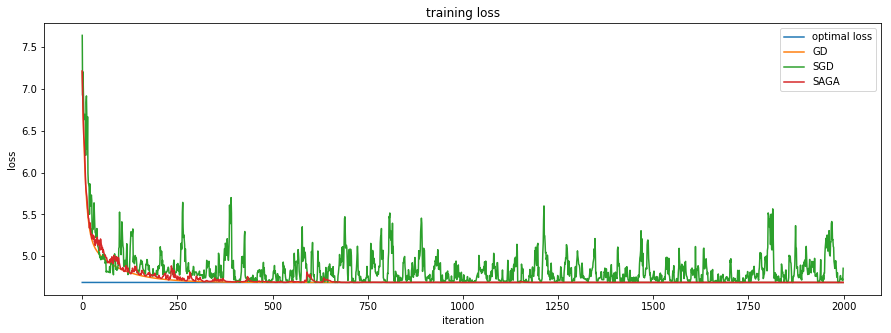

In [9]:
params = {'n_iterations': 10, 'lr': 0.1}

losses_gd,w_gd = gd(X, y, **params)
losses_sgd,w_sgd = sgd(X, y, **params)
losses_saga,w_saga = saga(X, y, **params)

#print("GD weights:", w_gd)
#print("SGD weights", w_sgd)
#print("SAGA weights", w_saga)

#plot_loss([losses_sgd],['SGD'])
#plot_loss([losses_gd],['GD'])
#plot_loss([losses_saga],['SAGA'])
plot_loss([losses_gd,losses_sgd,losses_saga],['GD','SGD','SAGA'])

best loss 0.394949790973


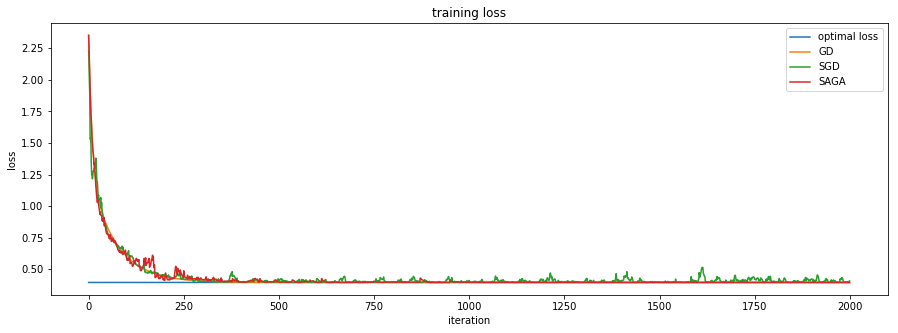

In [10]:
X,y = (generate_data(noise = 1))
losses_gd,w_gd = gd(X,y, **params)
losses_sgd,w_sgd = sgd(X,y, **params)
losses_saga,w_saga = saga(X,y, **params)
plot_loss([losses_gd,losses_sgd,losses_saga],['GD','SGD','SAGA'])

best loss 25.6743988656


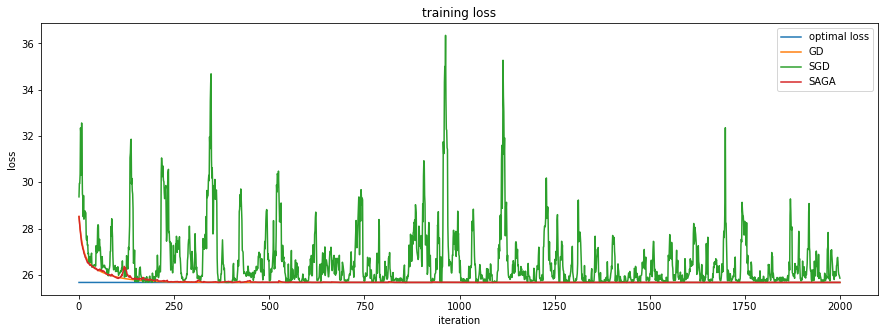

In [11]:
X,y = (generate_data(noise = 8))
losses_gd,w_gd = gd(X,y, **params)
losses_sgd,w_sgd = sgd(X,y, **params)
losses_saga,w_saga = saga(X,y, **params)
plot_loss([losses_gd,losses_sgd,losses_saga],['GD','SGD','SAGA'])